<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/gdpd_uncert2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #https://www.policyuncertainty.com/
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

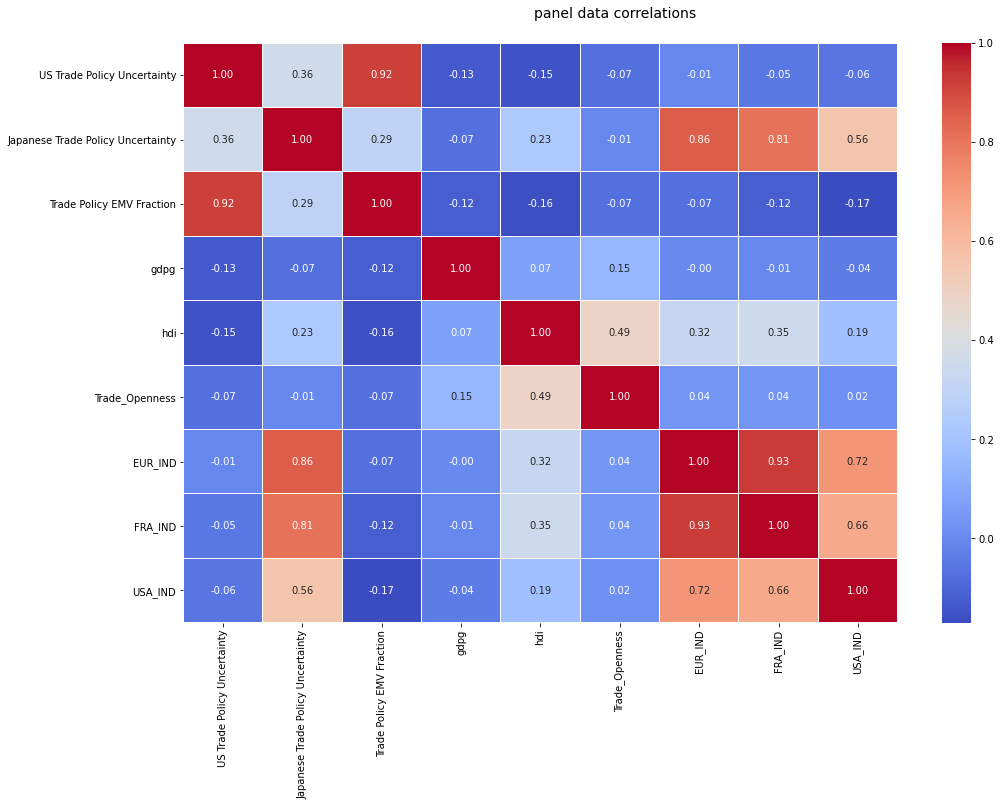

In [ ]:
import seaborn as sn
f, ax = plt.subplots(figsize=(16, 10))
corr = data1.iloc[:,[1,2,3,6,7,8,9,10,11]].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('panel data correlations', fontsize=14)

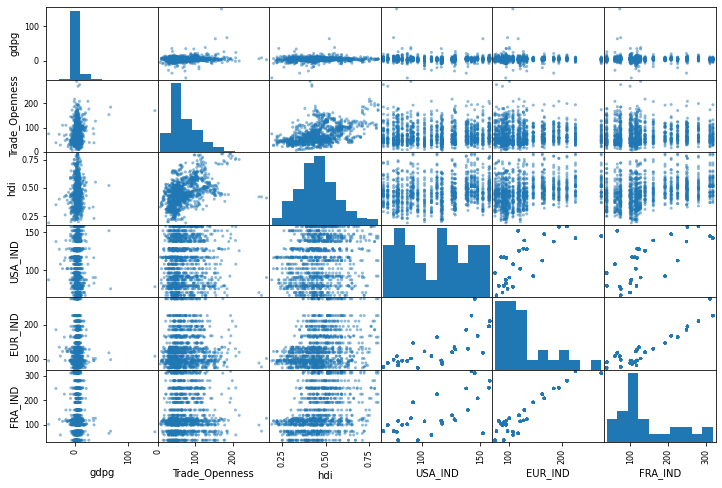

In [ ]:
#plot every numerical attribute againdt every other numerical attribute
from pandas.plotting import scatter_matrix
attributes=['gdpg',"Trade_Openness","hdi",'USA_IND','EUR_IND','FRA_IND']
scatter_matrix(data[attributes],figsize=(12,8));

In [ ]:
data1.iloc[:,3:].describe().round(2)

,Trade Policy EMV Fraction,gdpg,hdi,Trade_Openness,EUR_IND,FRA_IND,USA_IND
count,1260.00,1260.00,1119.00,1260.00,1260.00,1260.00,1260.00
mean,0.03,4.18,0.46,69.59,128.84,142.26,112.12
std,0.02,7.39,0.11,38.01,49.44,78.66,28.13
min,0.01,-50.25,0.19,5.45,74.20,37.60,67.14
25%,0.02,1.72,0.38,42.51,93.68,93.19,86.48
50%,0.03,4.20,0.45,58.20,113.16,116.72,114.78
75%,0.03,6.43,0.52,90.81,150.65,195.31,138.32
max,0.08,149.97,0.80,290.50,274.78,317.12,157.98


In [ ]:
#convert year to datetime
project1=data1.copy()
project1['Year']=pd.to_datetime(project1['Year'],format='%Y')
project1=project1.set_index('Year',append=True)
project1.index=project1.index.swaplevel(0,1)
print(project1.head())

              US Trade Policy Uncertainty  ...  USA_IND
Year                                       ...         
1990-01-01 0                       115.84  ...   117.47
           1                       115.84  ...   117.47
           2                       115.84  ...   117.47
           3                       115.84  ...   117.47
           4                       115.84  ...   117.47

[5 rows x 11 columns]


In [ ]:
project.head()

Country Code  gdpg  ...  EUR_IND  FRA_IND  USA_IND
Year                                   ...                           
1990-01-01 0        Angola  AGO -3.45  ...    85.76   105.06   117.47
           1       Burundi  BDI  3.50  ...    85.76   105.06   117.47
           2         Benin  BEN  8.98  ...    85.76   105.06   117.47
           3  Burkina Faso  BFA -0.60  ...    85.76   105.06   117.47
           4      Botswana  BWA  6.77  ...    85.76   105.06   117.47

[5 rows x 8 columns]

In [ ]:
!pip install linearmodels;
import math
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [ ]:
X=project1.iloc[:,[0,1,6,8,10]]
y=project1.iloc[:,5]

In [ ]:
mod = PanelOLS(y, X, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   gdpg   R-squared:                        0.0010
Estimator:                   PanelOLS   R-squared (Between):              0.1425
No. Observations:                1119   R-squared (Within):               0.0010
Date:                Sat, Jun 20 2020   R-squared (Overall):              0.0563
Time:                        03:18:59   Log-likelihood                   -3474.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.2147
Entities:                          28   P-value                           0.9564
Avg Obs:                       39.964   Distribution:                  F(5,1086)
Min Obs:                       32.000                                           
Max Obs:                       45.000   F-statistic (robust):             1.4925
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
#Panels First Difference for everything
from linearmodels import BetweenOLS
mod_first = BetweenOLS(y, X)
res_first = mod_first.fit(cov_type='robust')
#res_first = mod_first.fit(cov_type='clustered', cluster_entity=True)
print(res_first)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                   gdpg   R-squared:                        0.9346
Estimator:                 BetweenOLS   R-squared (Between):              0.9346
No. Observations:                  28   R-squared (Within):              -0.0347
Date:                Sat, Jun 20 2020   R-squared (Overall):              0.3452
Time:                        03:19:02   Log-likelihood                   -41.851
Cov. Estimator:                Robust                                           
                                        F-statistic:                      65.724
Entities:                          28   P-value                           0.0000
Avg Obs:                       39.964   Distribution:                    F(5,23)
Min Obs:                       32.000                                           
Max Obs:                       45.000   F-statistic (robust):             86.117
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
#random effects for high
mod_f_highr = RandomEffects(y, X)
res_f_highr = mod_f_highr.fit(cov_type='robust')
print(res_f_highr)

                        RandomEffects Estimation Summary                        
Dep. Variable:                   gdpg   R-squared:                        0.2283
Estimator:              RandomEffects   R-squared (Between):              0.9128
No. Observations:                1119   R-squared (Within):              -0.0018
Date:                Sat, Jun 20 2020   R-squared (Overall):              0.3573
Time:                        03:19:05   Log-likelihood                   -3491.4
Cov. Estimator:                Robust                                           
                                        F-statistic:                      65.900
Entities:                          28   P-value                           0.0000
Avg Obs:                       39.964   Distribution:                  F(5,1114)
Min Obs:                       32.000                                           
Max Obs:                       45.000   F-statistic (robust):             85.928
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
from linearmodels import PooledOLS
exog = sm.add_constant(X)
mod_poo = PooledOLS(y, exog)
p_res = mod_poo.fit(cov_type='clustered', cluster_entity=True)
print(p_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                   gdpg   R-squared:                        0.0472
Estimator:                  PooledOLS   R-squared (Between):              0.6040
No. Observations:                1119   R-squared (Within):               0.0010
Date:                Sat, Jun 20 2020   R-squared (Overall):              0.0472
Time:                        03:19:17   Log-likelihood                   -3494.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.018
Entities:                          28   P-value                           0.0000
Avg Obs:                       39.964   Distribution:                  F(5,1113)
Min Obs:                       32.000                                           
Max Obs:                       45.000   F-statistic (robust):             8.8839
                            

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


In [ ]:
from linearmodels.panel import compare
print(compare({'BE':res_first,'RE':res_f_highr,'Pooled':p_res}))

                              Model Comparison                              
                                              BE              RE      Pooled
----------------------------------------------------------------------------
Dep. Variable                               gdpg            gdpg        gdpg
Estimator                             BetweenOLS   RandomEffects   PooledOLS
No. Observations                              28            1119        1119
Cov. Est.                                 Robust          Robust   Clustered
R-squared                                 0.9346          0.2283      0.0472
R-Squared (Within)                       -0.0347         -0.0018      0.0010
R-Squared (Between)                       0.9346          0.9128      0.6040
R-Squared (Overall)                       0.3452          0.3573      0.0472
F-statistic                               65.724          65.900      11.018
P-value (F-stat)                          0.0000          0.0000      0.0000

In [ ]:
dat=pd.read_csv('dataf.csv')
dat.tail()

,Year,Country,Code,USTPU,JPTU,GDPG,HDI,TO,EEPU,FEPU,USEPU,AGRVA,CRPT
807,2017,Tanzania,TZA,149.4,227.92,6.79,0.52,32.62,226.05,317.12,142.4,28.74,2.0
808,2017,Uganda,UGA,149.4,227.92,3.86,0.52,43.43,226.05,317.12,142.4,24.58,1.5
809,2017,South Africa,ZAF,149.4,227.92,1.41,0.70,58.18,226.05,317.12,142.4,2.36,2.5
810,2017,Zambia,ZMB,149.4,227.92,3.40,0.59,71.96,226.05,317.12,142.4,4.02,2.2
811,2017,Zimbabwe,ZWE,149.4,227.92,4.70,0.55,58.97,226.05,317.12,142.4,9.66,1.0


In [ ]:
Angola=dat[dat['Country']=="Cameroon"].dropna()
Angola.count

<bound method DataFrame.count of      Year   Country Code   USTPU    JPTU  ...    EEPU    FEPU   USEPU  AGRVA  CRPT
4    1990  Cameroon  CMR  115.84  110.51  ...   85.76  105.06  117.47  23.99   3.0
33   1991  Cameroon  CMR  104.35  116.79  ...   91.38  111.94  117.20  24.26   3.0
62   1992  Cameroon  CMR  194.69  109.02  ...   95.71  117.25  116.61  26.58   3.0
91   1993  Cameroon  CMR  359.54  161.75  ...  121.86  114.28  102.29  15.16   3.0
120  1994  Cameroon  CMR  281.92  120.44  ...   94.45  102.57   87.57  16.89   3.0
149  1995  Cameroon  CMR  125.25   96.06  ...   95.11  100.28   83.19  17.87   3.0
178  1996  Cameroon  CMR   87.35   74.41  ...   97.89   74.64   75.83  17.69   3.0
207  1997  Cameroon  CMR   96.36   76.66  ...  107.87   72.22   78.51  18.18   2.5
236  1998  Cameroon  CMR   63.34   48.54  ...  108.41   59.49  108.19  17.59   2.0
265  1999  Cameroon  CMR   69.89   80.95  ...   90.57   38.21   79.74  18.32   2.0
294  2000  Cameroon  CMR   88.67   61.78  ...   74.20 

In [ ]:
dat.iloc[:,[5,6,7,9,11,12]].describe().round(2)

,GDPG,HDI,TO,FEPU,AGRVA,CRPT
count,812.00,736.00,812.00,812.00,792.00,812.00
mean,3.92,0.44,60.28,142.26,25.74,2.30
std,4.95,0.10,30.72,78.67,14.51,0.97
min,-30.15,0.21,5.45,37.60,1.83,0.00
25%,2.02,0.38,40.59,93.19,15.55,1.70
50%,4.31,0.44,52.54,116.72,25.10,2.00
75%,6.49,0.51,73.81,195.31,35.69,3.00
max,26.42,0.72,290.50,317.12,79.04,5.00


In [ ]:
dat.iloc[:,[5,10,11]].corr()

,GDPG,USEPU,AGRVA
GDPG,1.000000,0.025912,-0.036959
USEPU,0.025912,1.000000,-0.051054
AGRVA,-0.036959,-0.051054,1.000000


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
data2=dat.iloc[:,[5,9,6,7,11,12]].dropna()
model=VAR(data2)
results=model.fit(2)
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Jun, 2020
Time:                     00:40:58
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    13.2523
Nobs:                     728.000    HQIC:                   12.9502
Log likelihood:          -10764.7    FPE:                    348186.
AIC:                      12.7605    Det(Omega_mle):         313105.
--------------------------------------------------------------------
Results for equation GDPG
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            4.072113         1.907893            2.134           0.033
L1.GDPG          0.048140         0.037165            1.295           0.195
L1.FEPU         -0.003013         0.026233           -0.115           0.909
L1.HD

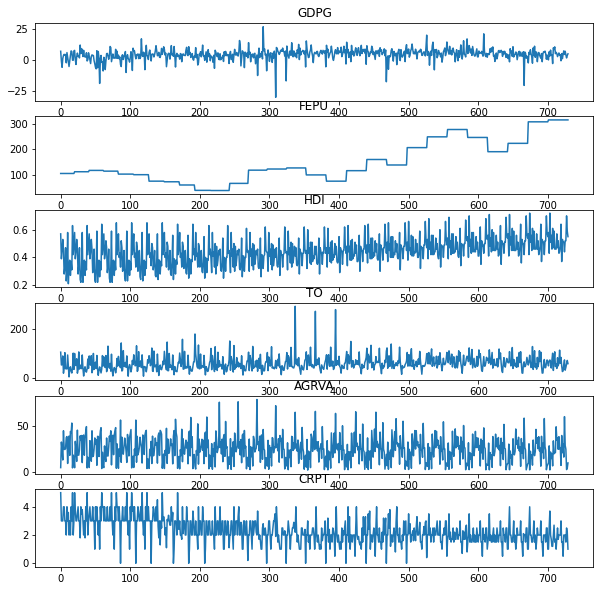

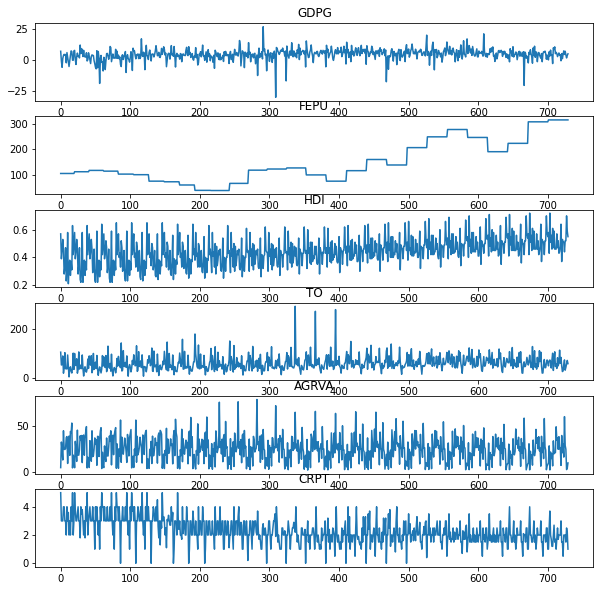

In [ ]:
results.plot()

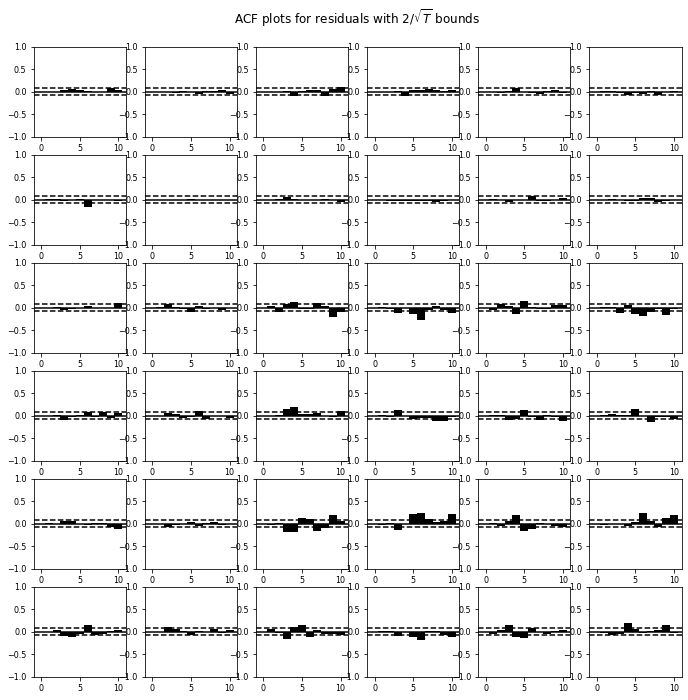

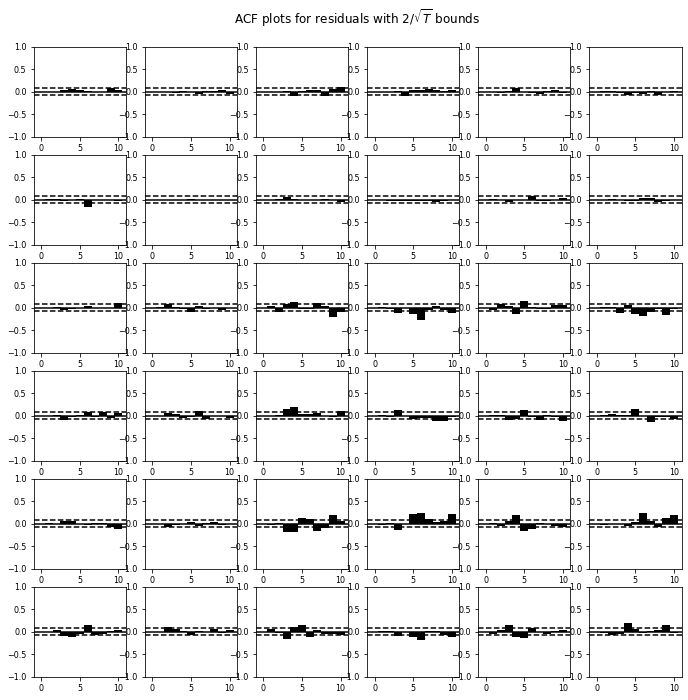

In [ ]:
#autocorrelation function
results.plot_acorr()

In [ ]:
#lag order selection
model.select_order(15)
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar
results.forecast(data2.values[-lag_order:], 5)

array([[  4.44617143, 326.6862518 ,   0.51816837,  73.54112703,
         14.64288889,   1.16082371],
       [  3.65492339, 327.43685502,   0.55714394,  77.30519199,
         16.08167466,   2.1594826 ],
       [  2.80734519, 326.66988309,   0.61616841,  84.63719945,
         13.72234371,   2.41056949],
       [  4.73936704, 326.12469067,   0.53695531,  72.68525464,
         23.74106439,   2.11176155],
       [  4.45400705, 326.99830255,   0.55431858,  58.23811471,
         16.74787512,   2.20011548]])

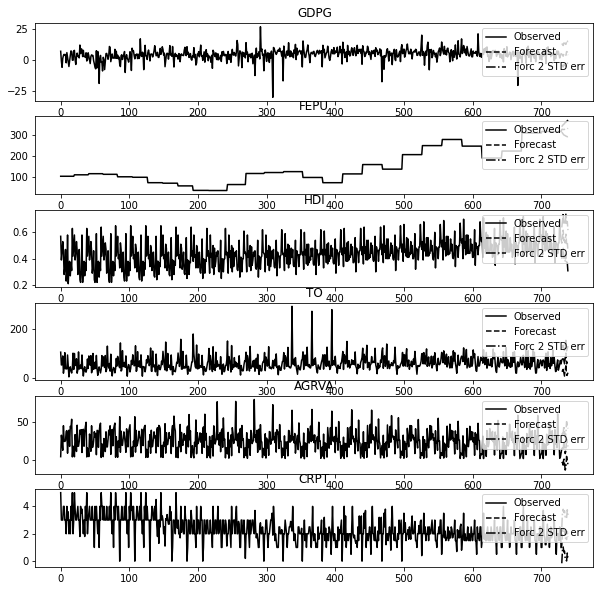

<Figure size 1152x720 with 0 Axes>

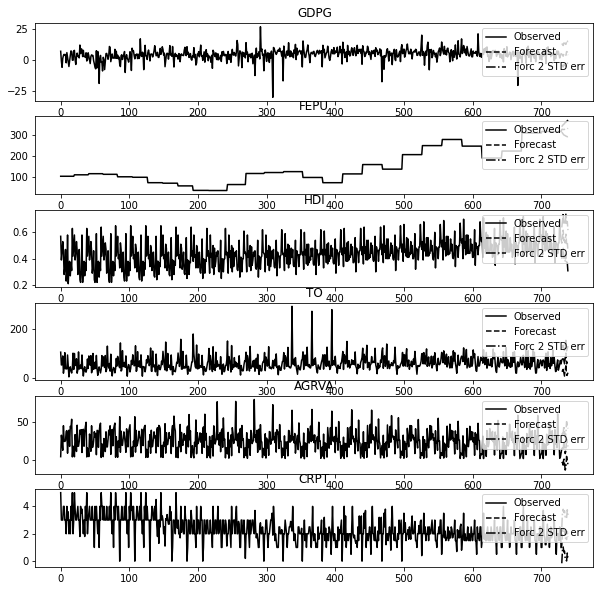

In [ ]:
plt.figure(figsize=(16,10))
results.plot_forecast(10)


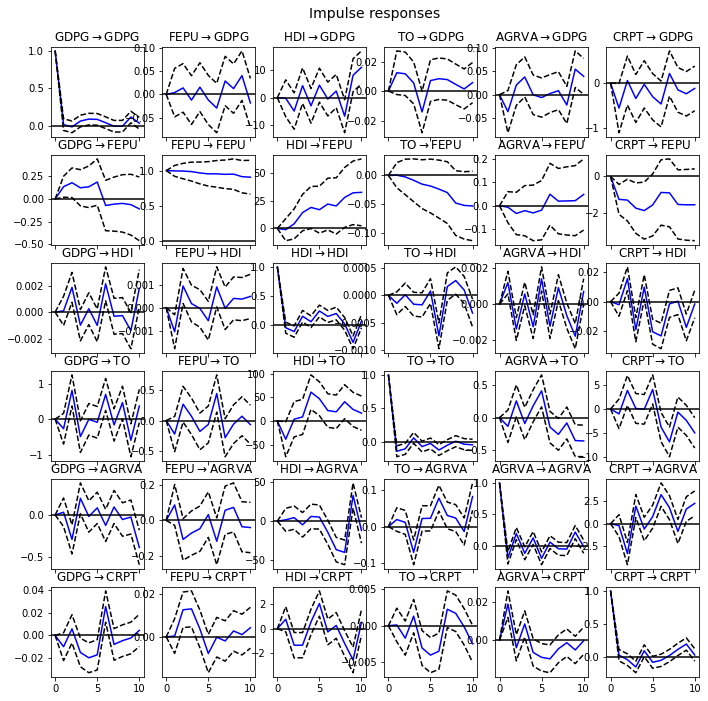

<Figure size 1152x720 with 0 Axes>

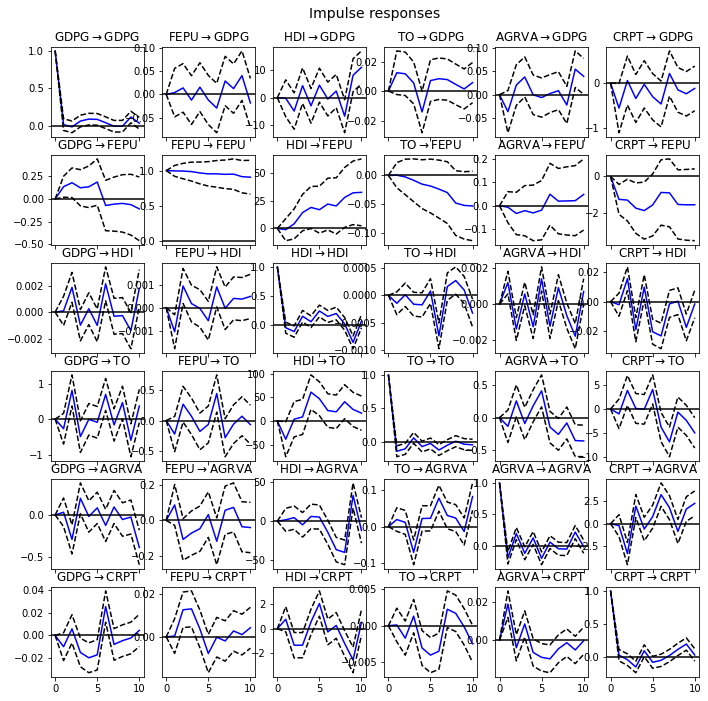

In [ ]:
#svar
plt.figure(figsize=(16,10))
irf=results.irf(10)
irf.plot(orth=False)